In [ ]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Get Some Data

In [ ]:
#load data shapefile poly provinsi
prov_path = gpd.read_file('/content/drive/MyDrive/geospatial/prov.shp')

prov_path.head()

,NAME_0,NAME_1,KODE,geometry
0,Indonesia,Bangka Belitung,19,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
1,Indonesia,Gorontalo,75,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0..."
2,Indonesia,Riau,14,"MULTIPOLYGON (((101.64432 -0.82552, 101.64344 ..."
3,Indonesia,Jakarta Raya,31,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ..."
4,Indonesia,Kepulauan Riau,21,"MULTIPOLYGON (((105.25355 -1.29511, 105.25032 ..."


In [ ]:
#mengganti Jakarta Raya menjadi DKI Jakarta dan Yogyakarta menjadi Daerah Istimewa Yogyakarta
prov_path = prov_path.replace({'Jakarta Raya': 'DKI Jakarta', 'Yogyakarta': 'Daerah Istimewa Yogyakarta'})

In [ ]:
#mengubah nama kolom NAME_1 menjadi Province
prov_path.rename(columns={'NAME_1':'Province'}, inplace=True)

In [ ]:
#load data csv covid19
covid19 = pd.read_csv('/content/drive/MyDrive/geospatial/covid19 dataset.csv')

covid19.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,35,39,415,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.09,0.0,3.23,7.16%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,35,39,417,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.27,0.0,3.23,7.13%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,10,624,-622,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.27,0.0,0.22,83.33%,5200.00%,NaN,NaN
4,3/2/2020,ID-RI,Riau,1,0,0,1,2,2,8,-8,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.33,100.00%,400.00%,NaN,NaN


In [ ]:
covid19["Date"] = pd.to_datetime(covid19["Date"]) #mengubah representasi string menjadi datetime
covid19['YearMonth'] = covid19['Date'].apply(lambda x:x.strftime('%Y%m')) #ekstrak hanya year dan month dari kolom Date

In [ ]:
#group by sum kolom Province dan YearMonth, kemudian reset index
covid19 = covid19.groupby(["Province","YearMonth"]).sum().reset_index()

In [ ]:
#merge shapefile poly dengan data covid19, join kolom Province
cov19_df = prov_path.merge(covid19, left_on="Province", right_on="Province")

cov19_df.head()

,NAME_0,Province,KODE,geometry,YearMonth,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
0,Indonesia,Gorontalo,75,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...",202004,15,1,2,12,146,10,90,46,0.0,105,21.0,1617,1512.0,13797.0,236397,24793671,2202.48,2569.897220,14.427055,12.70,123.68,0.85,8.50,10.40,18.00
1,Indonesia,Gorontalo,75,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...",202005,79,5,24,50,1067,56,528,483,0.0,155,31.0,2387,2232.0,20367.0,348967,36600181,3251.28,3793.657801,21.297081,66.90,903.72,4.24,47.42,53.29,25.50
2,Indonesia,Gorontalo,75,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...",202006,155,4,187,-36,5619,224,3494,1901,0.0,150,30.0,2310,2160.0,19710.0,337710,35419530,3146.40,3671.281743,20.610078,131.27,4759.25,3.40,189.78,28.16,24.00
3,Indonesia,Gorontalo,75,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...",202007,766,23,330,413,15674,703,9380,5591,0.0,155,31.0,2387,2232.0,20367.0,348967,36600181,3251.28,3793.657801,21.297081,648.79,13275.73,19.47,595.46,90.15,21.17
4,Indonesia,Gorontalo,75,"MULTIPOLYGON (((122.81573 0.84676, 122.81579 0...",202008,1026,21,1243,-238,53432,1360,39804,12268,0.0,155,31.0,2387,2232.0,20367.0,348967,36600181,3251.28,3793.657801,21.297081,869.02,45256.41,17.79,1151.93,68.39,13.00


In [ ]:
#load data shapefile point provinsi
ind_prov = gpd.read_file('/content/drive/MyDrive/geospatial/COVID19_Indonesia_per_Provinsi.shp')

ind_prov.head()

,FID,Kode_Provi,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni,geometry
0,1,11,Aceh,10814,9367,432,POINT (96.90952 4.22508)
1,2,12,Sumatera Utara,29198,25952,965,POINT (99.05789 2.18478)
2,3,13,Sumatera Barat,36268,33058,783,POINT (100.46681 -0.85191)
3,4,14,Riau,42698,37374,1050,POINT (101.81289 0.51053)
4,5,15,Jambi,7407,5987,108,POINT (103.59932 -1.61775)


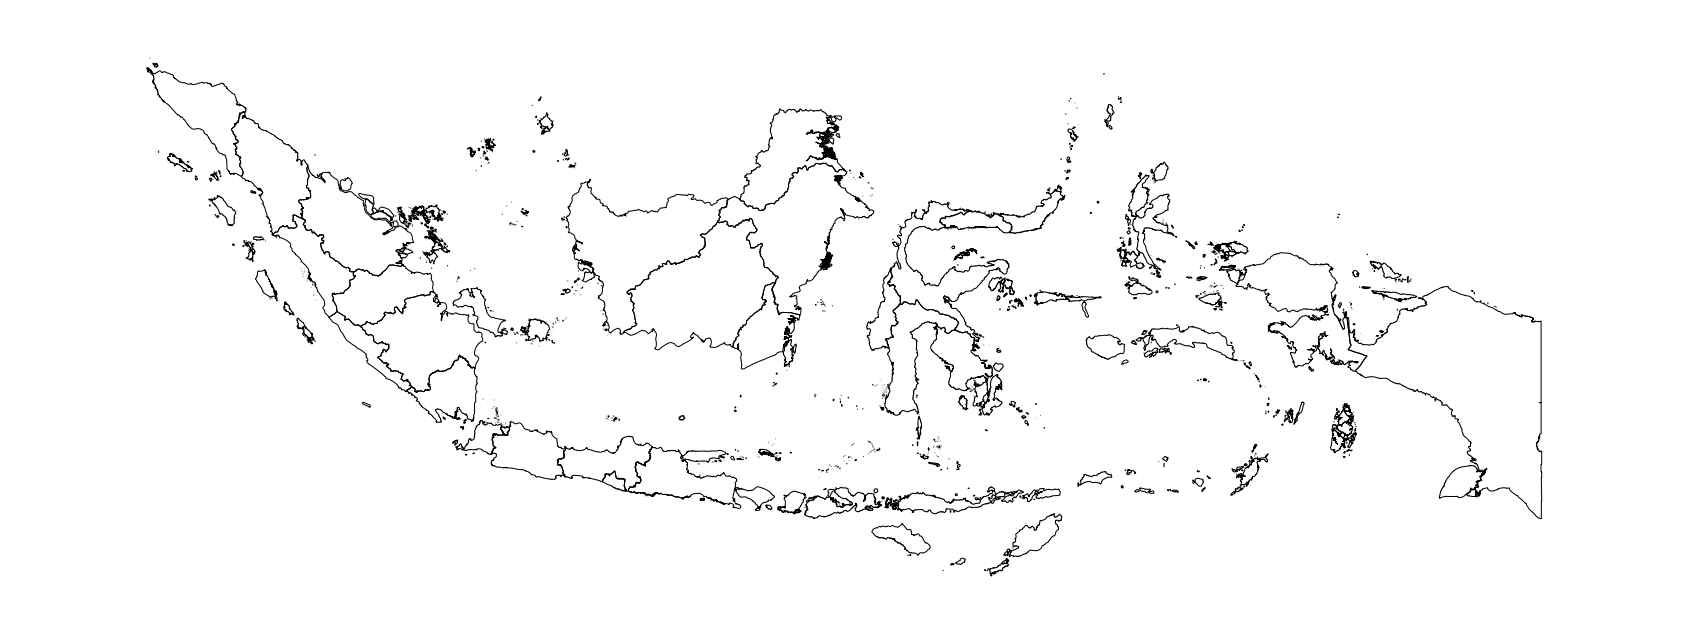

In [ ]:
#plot peta Indonesia
gplt.polyplot(prov_path, figsize=(30,30))

# Visualizing COVID-19 Data

Text(0.5, 1.0, 'COVID-19 Positive Cases')

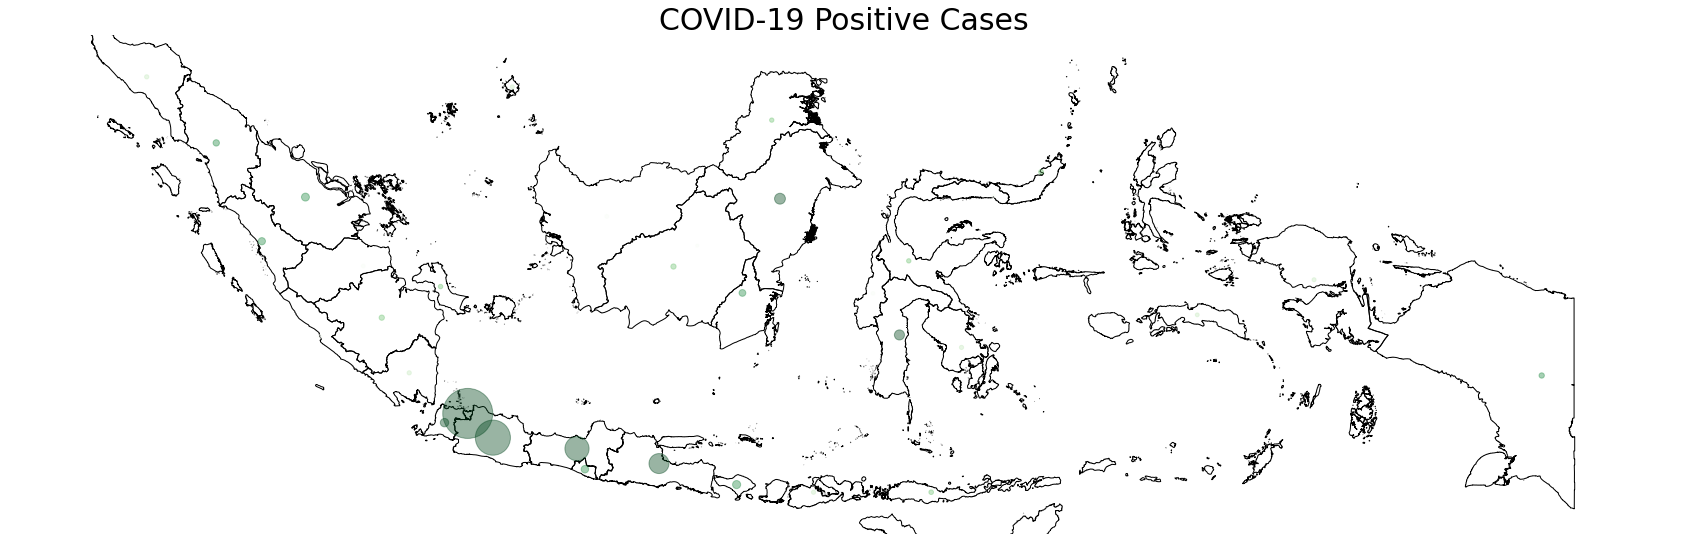

In [ ]:
ax = gplt.polyplot(prov_path, figsize=(30,30))  #plot shapefile poly
#plot shapefile point berdasarkan kolom Kasus_Posi
ax = gplt.pointplot(ind_prov, 
                    hue="Kasus_Posi", 
                    cmap="Greens", 
                    scheme="quantiles",
                    scale="Kasus_Posi",
                    limits=(3, 50),
                    zorder=2,
                    alpha = 0.4,
                    ax=ax)

ax.set_title("COVID-19 Positive Cases", fontsize=30)

**Berdasarkan hasil plot shapefile poly dan point diatas, DKI Jakarta menjadi penyumbang kasus positif covid19 terbanyak.**

Text(0.5, 1.0, 'COVID-19 Total Deaths per Million on Januari 2021')

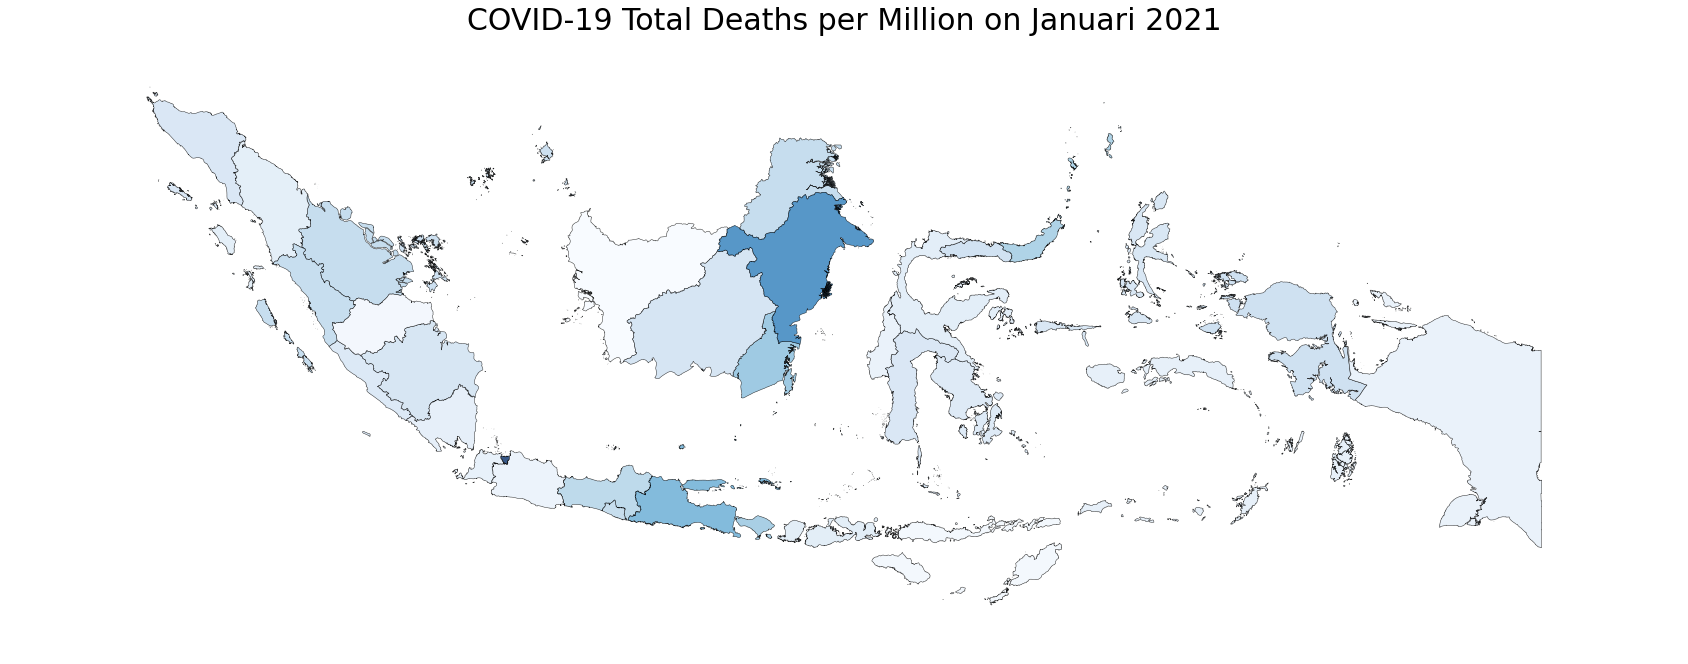

In [ ]:
jan2021 = cov19_df[cov19_df["YearMonth"] == "202101"] #ambil YearMonth hanya 202101
#plot peta choropleth berdasarkan kolom Total Deaths per Million pada bulan Januari 2021
ax = gplt.choropleth(jan2021,
                     hue="Total Deaths per Million",
                     edgecolor="black",
                     linewidth=0.5,
                     cmap="Blues",
                     alpha = 0.8,
                     figsize=(30,30)
                     )

ax.set_title(f"COVID-19 Total Deaths per Million on Januari 2021", fontsize=30)

**Berdasarkan hasil plot peta choropleth diatas, jumlah kematian covid19 terbanyak di Kalimantan Timur.**

In [ ]:
date_set = cov19_df.YearMonth.drop_duplicates() #drop baris duplikat
date_set.sort_values(ascending=True, inplace=True)  #sorting date_set secara asc 

date_set

12    202003
0     202004
1     202005
2     202006
3     202007
4     202008
5     202009
6     202010
7     202011
8     202012
9     202101
10    202102
11    202103
Name: YearMonth, dtype: object

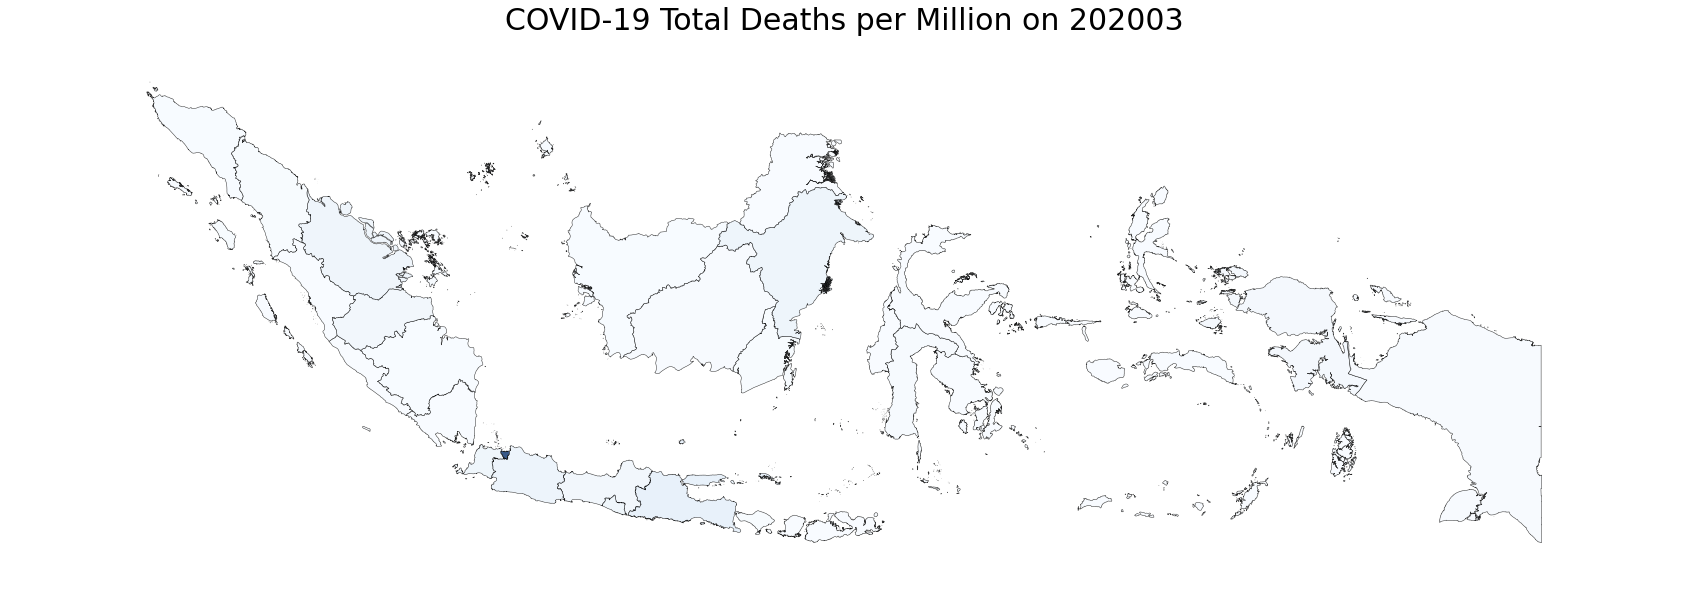

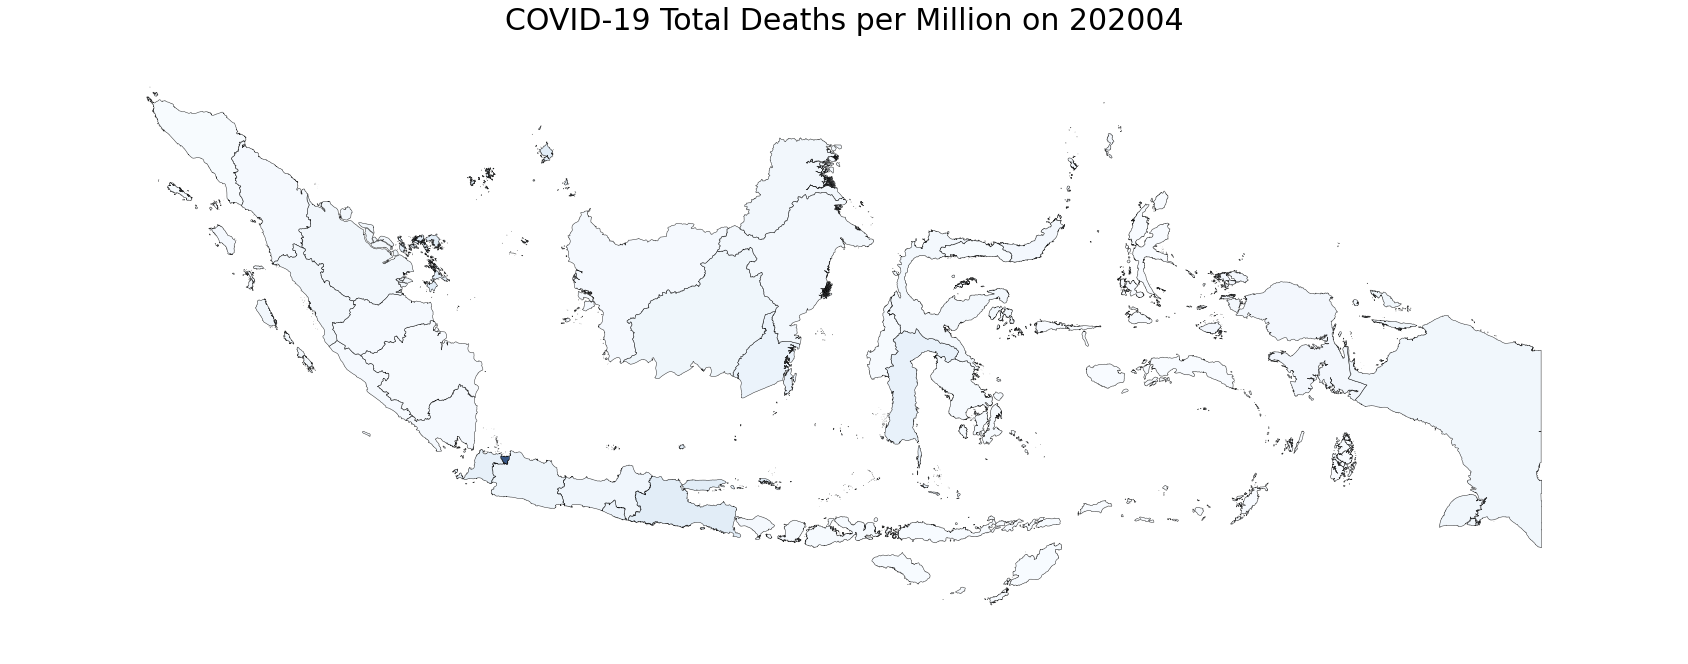

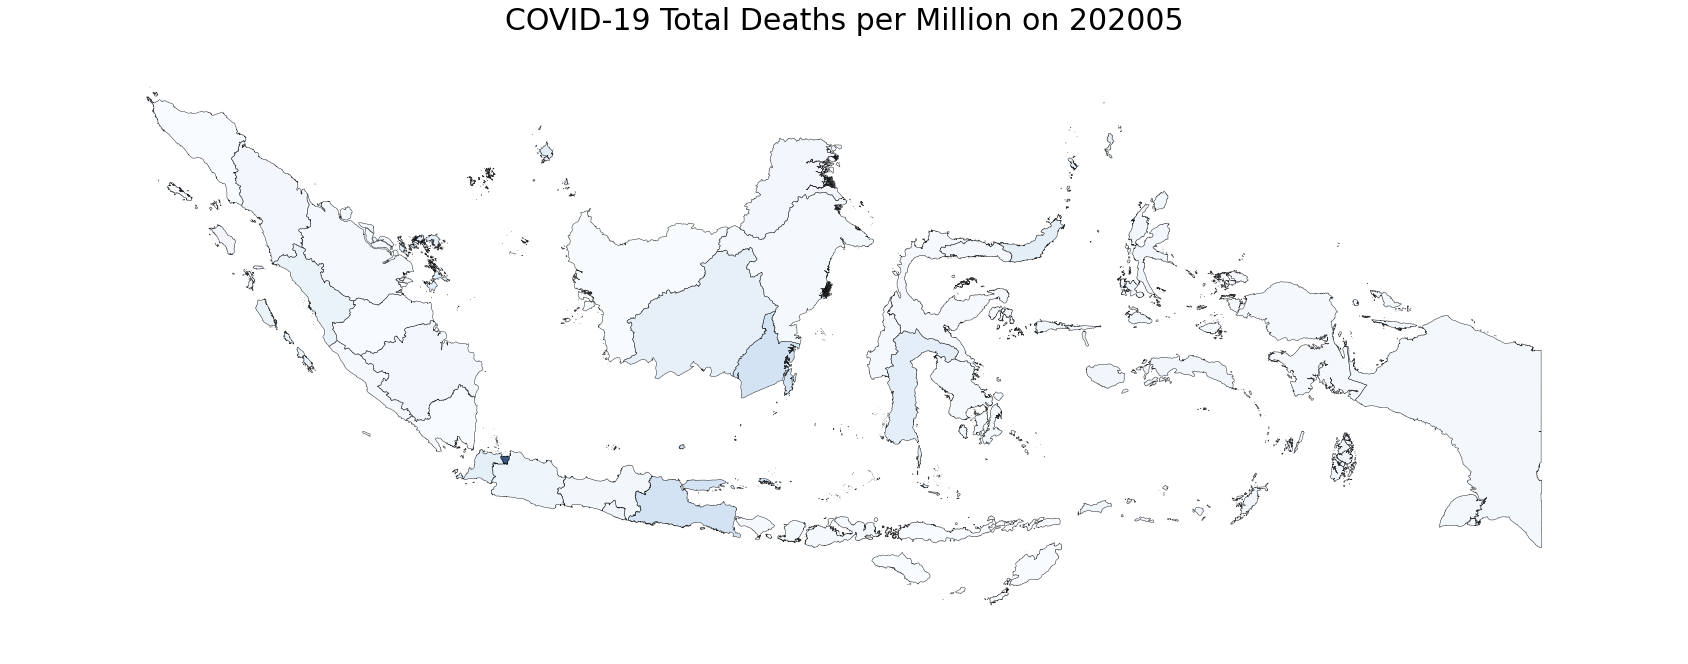

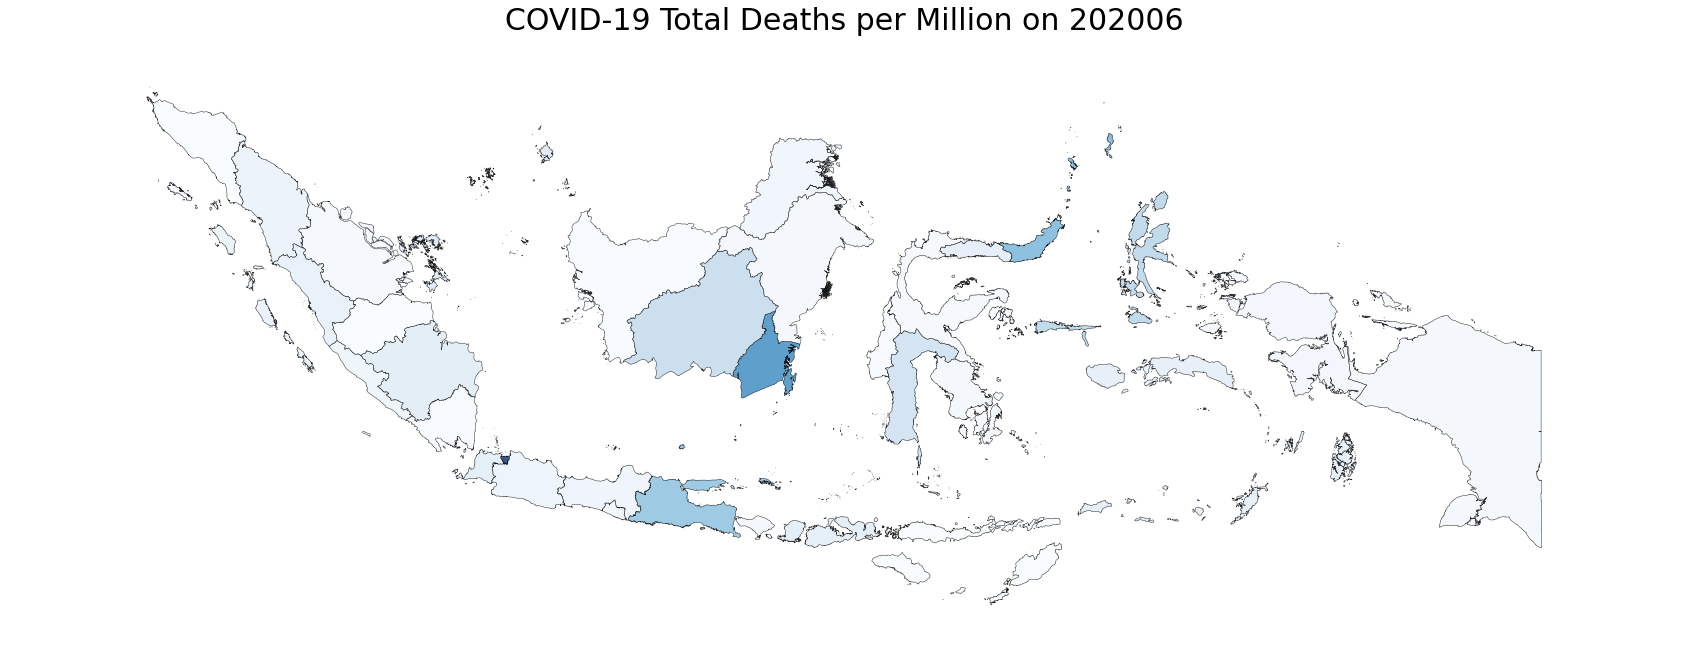

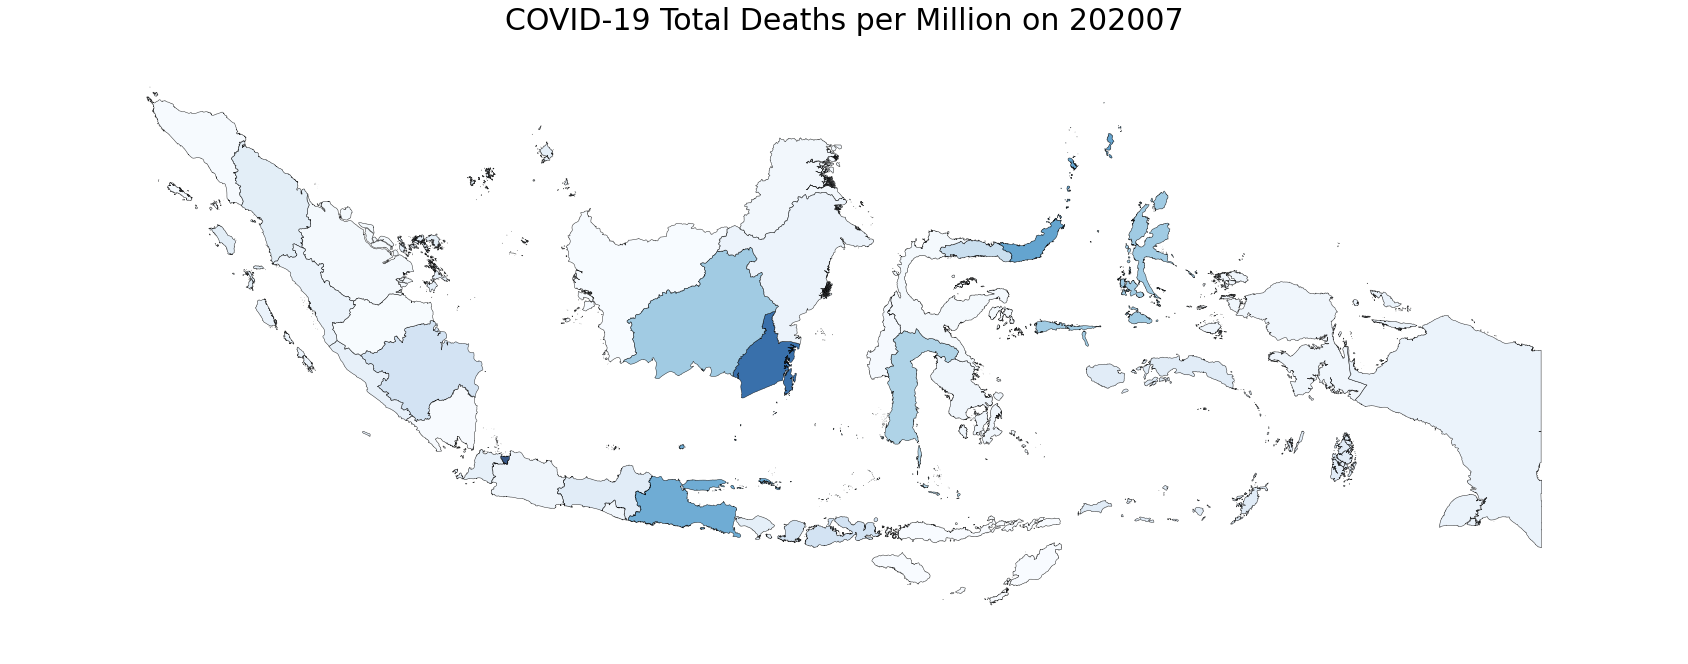

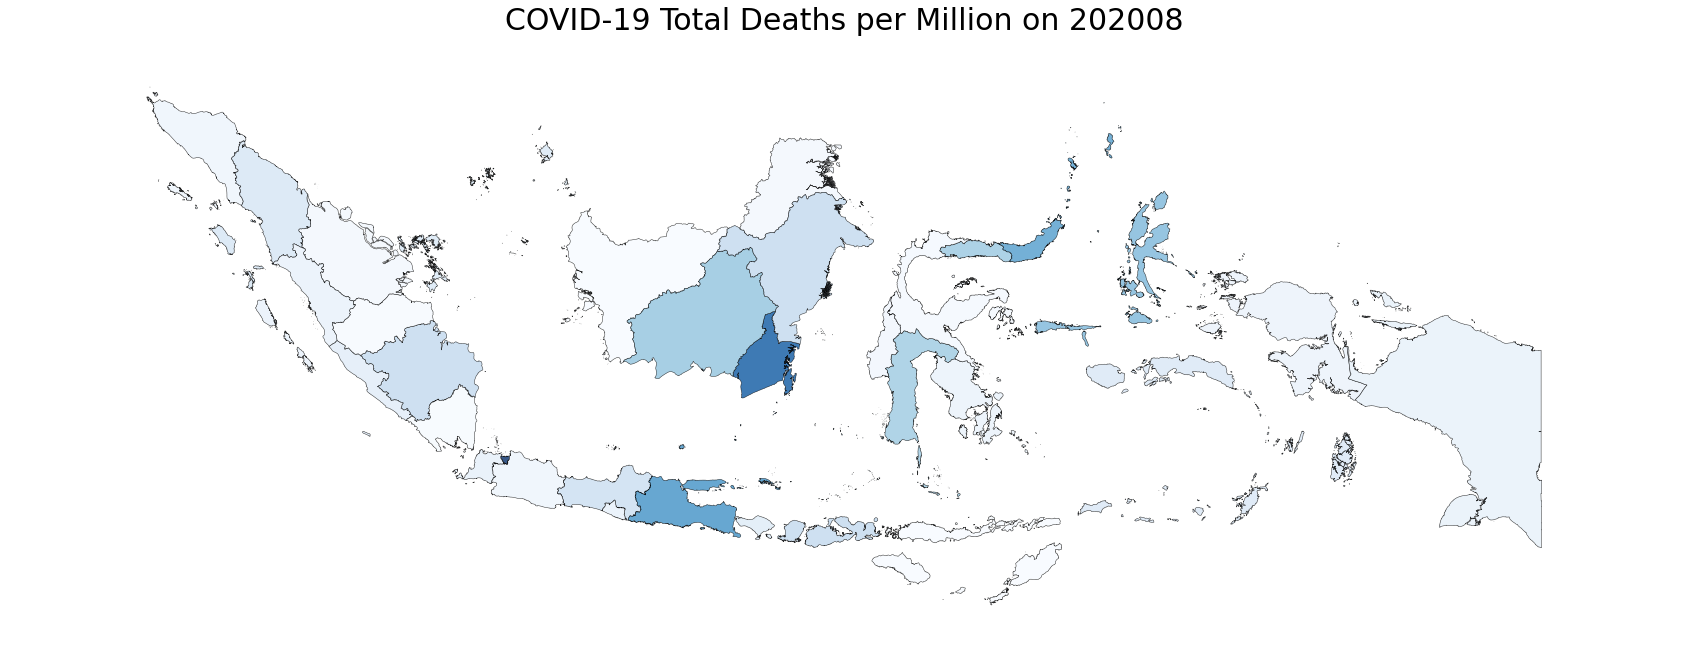

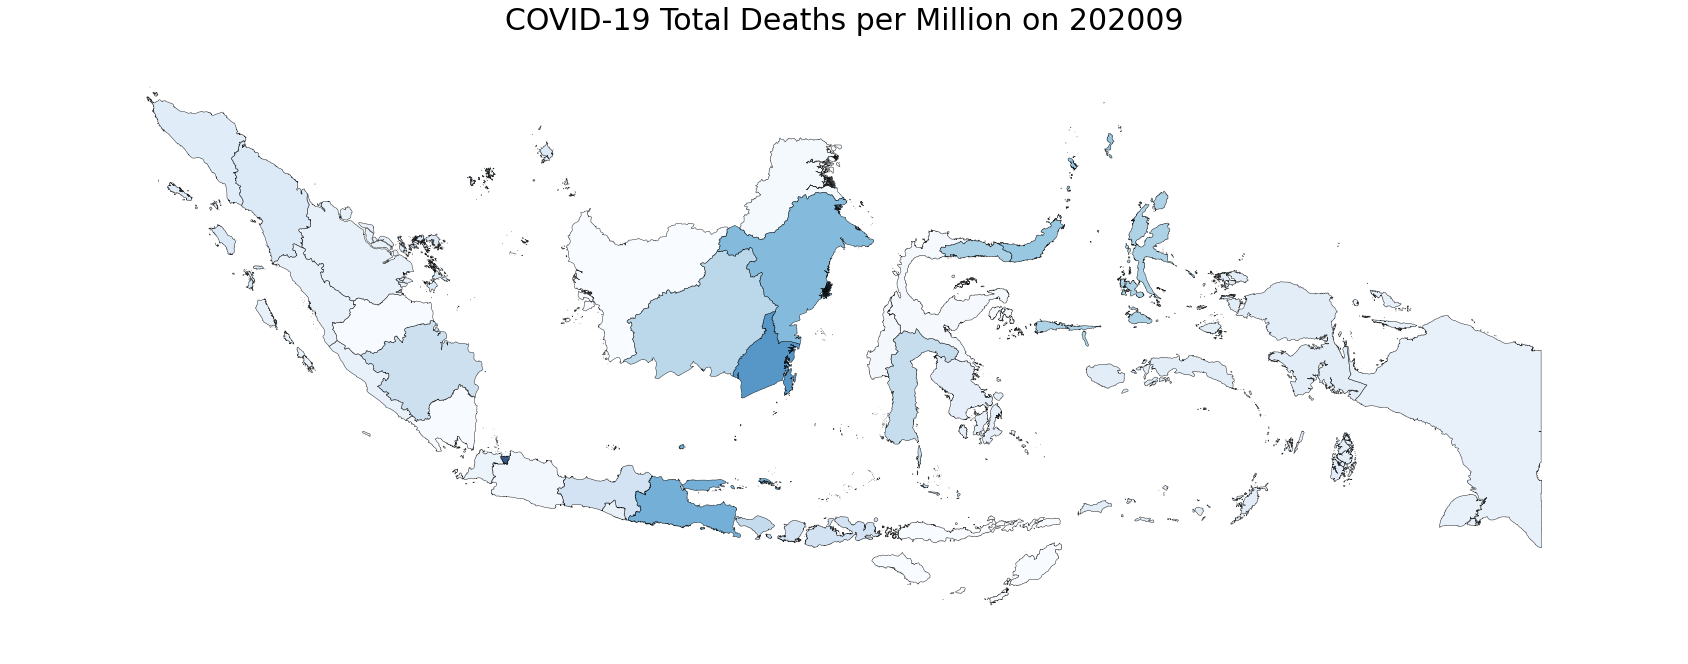

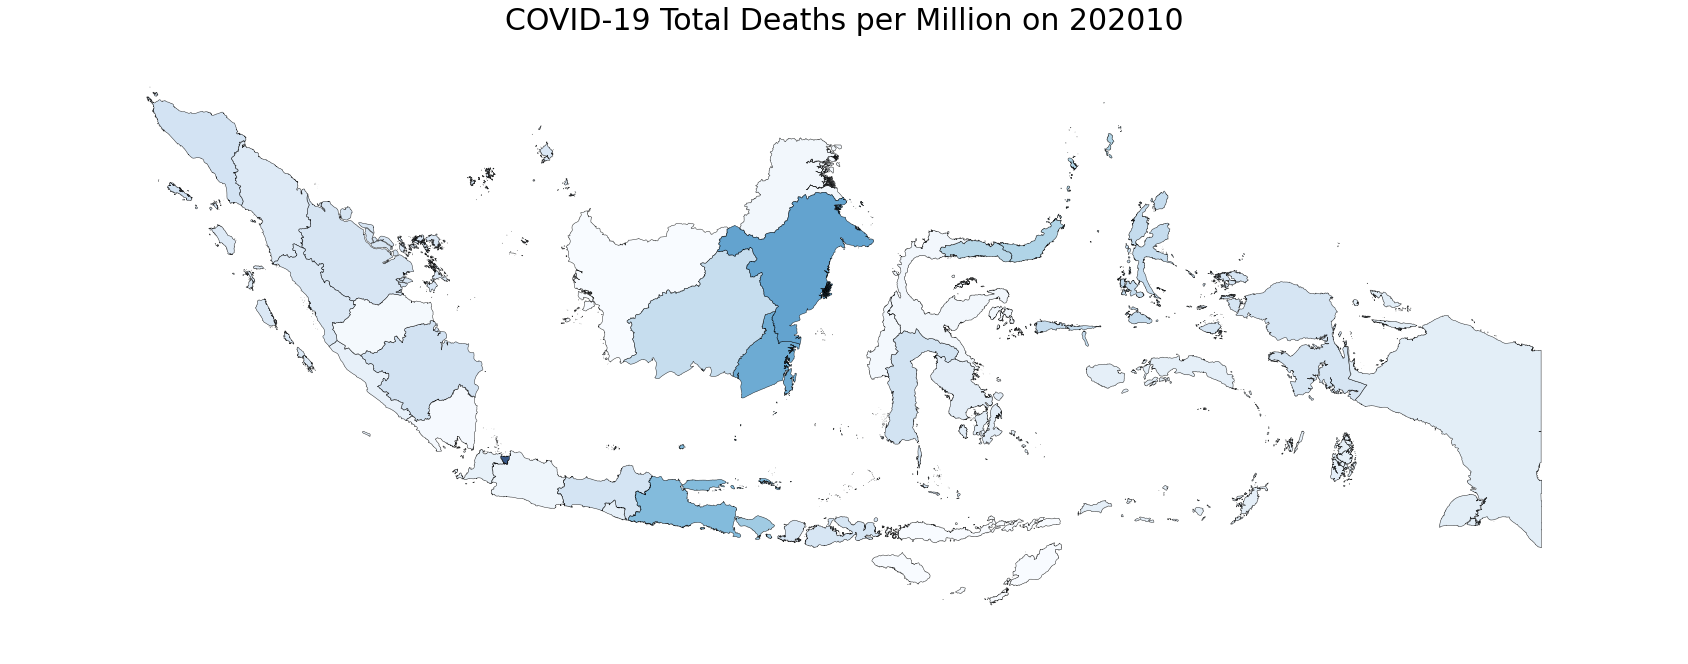

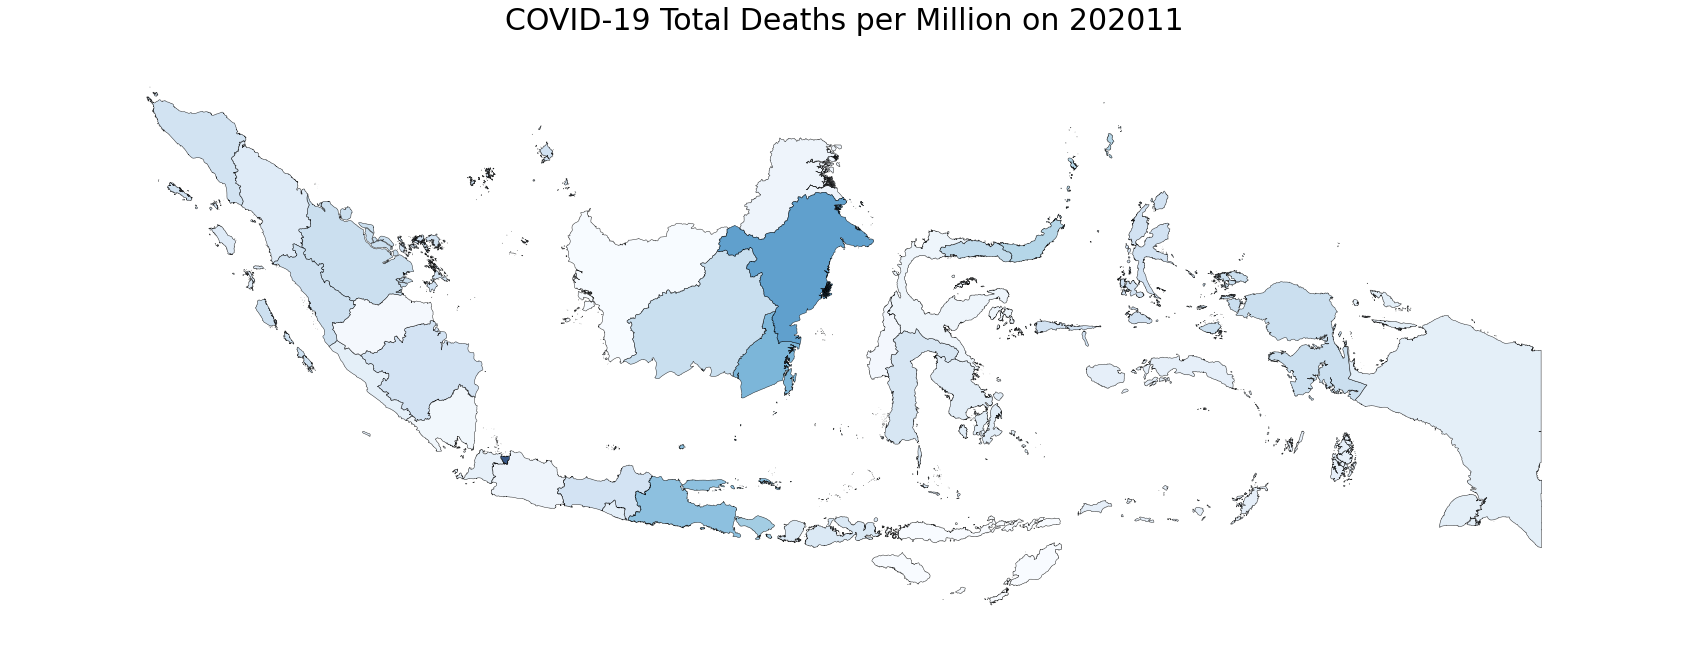

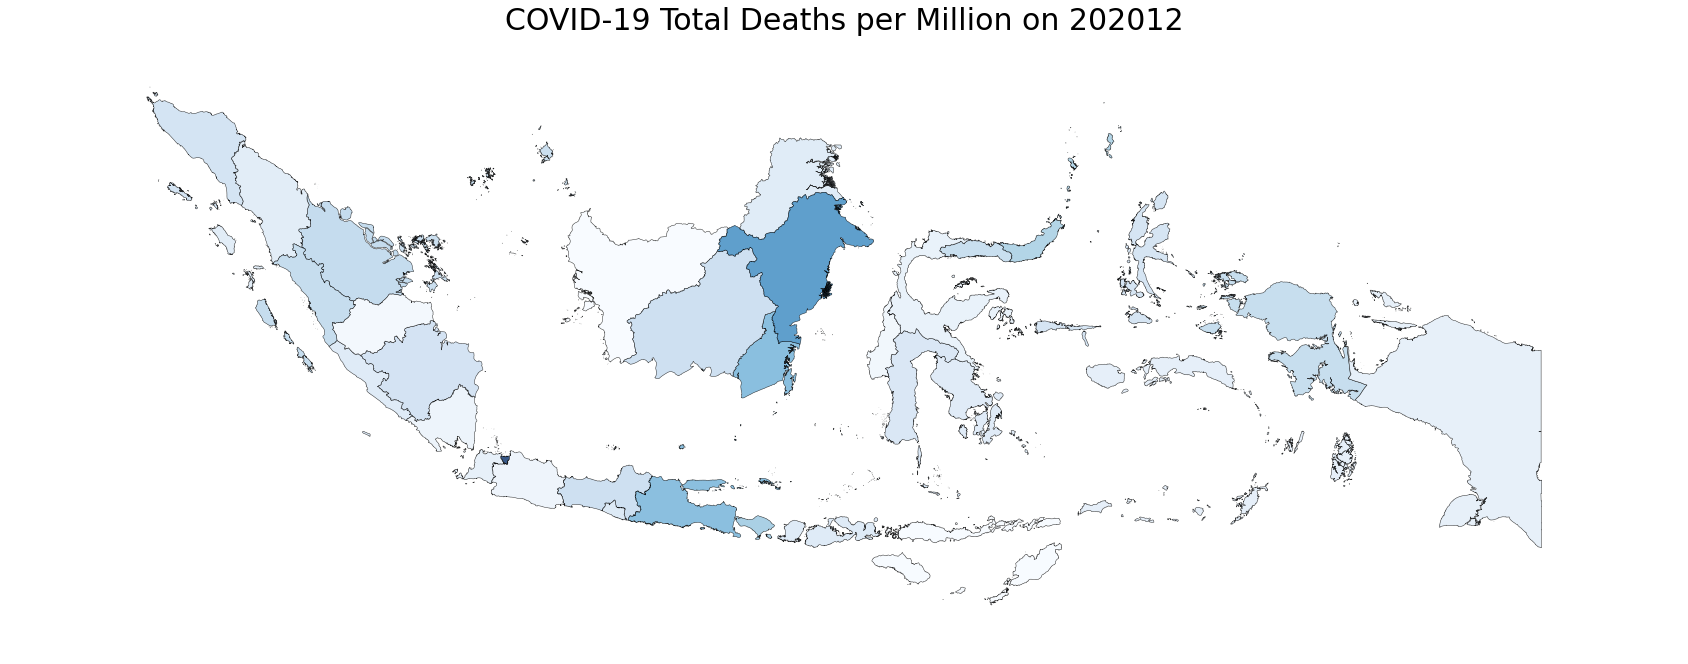

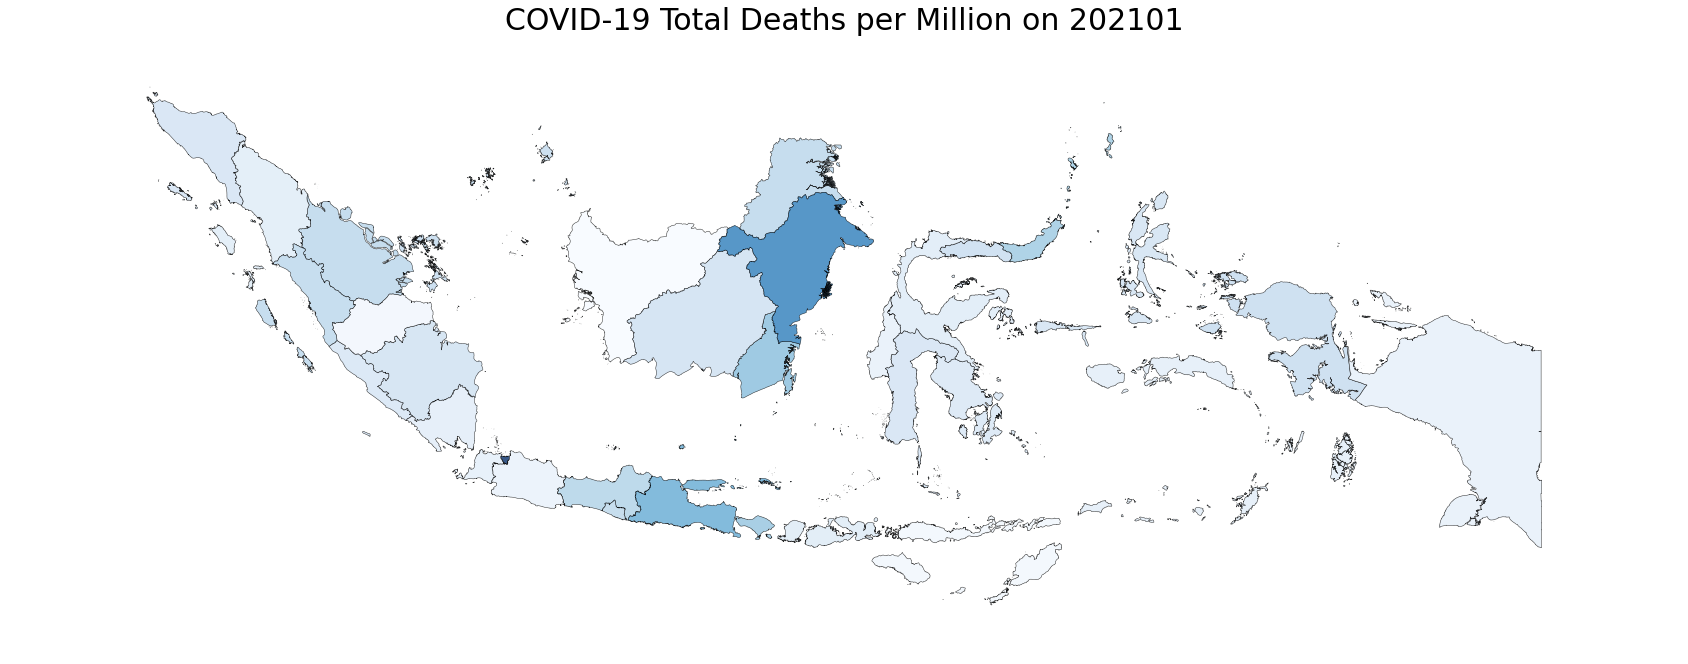

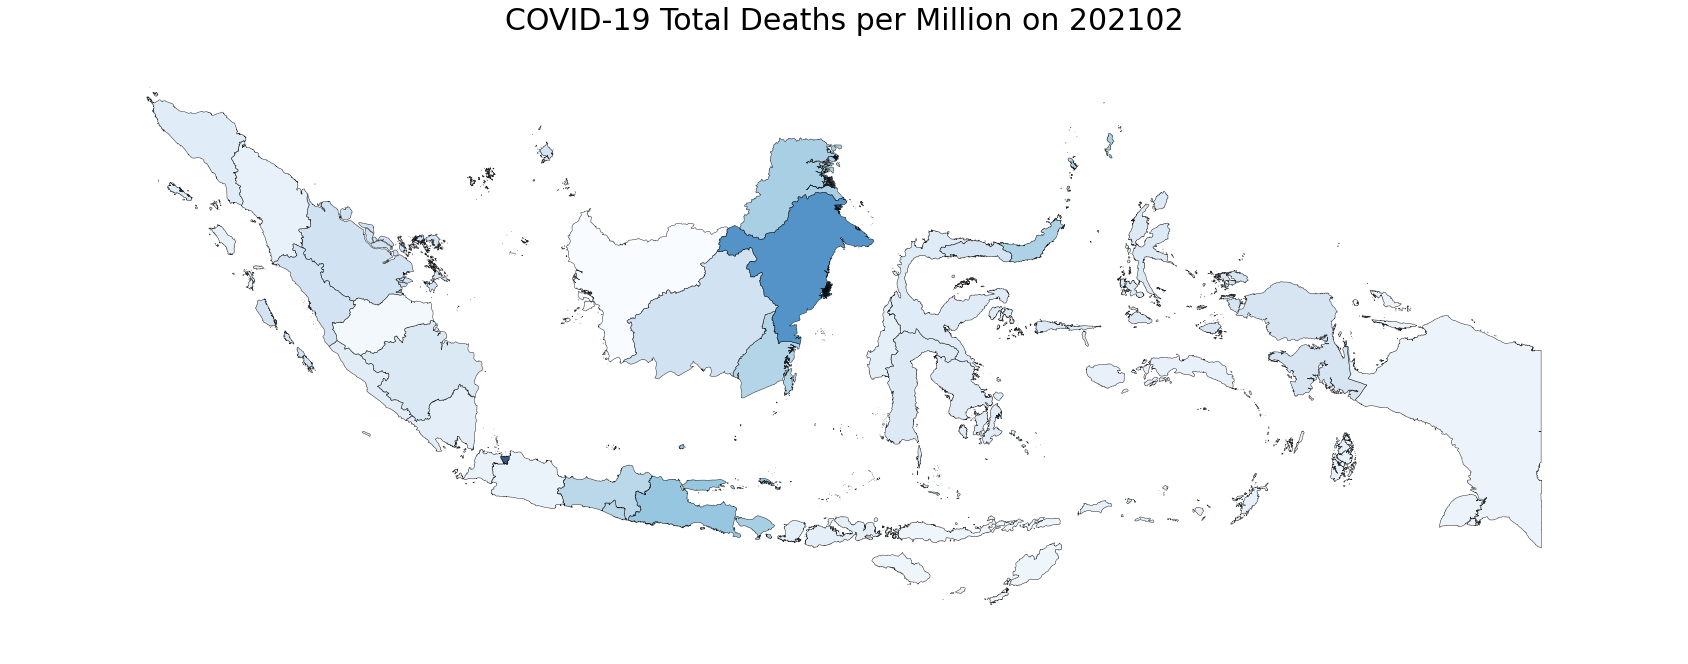

In [ ]:
#looping sebanyak date_set untuk memvisualisasi Total Deaths per Million setiap bulan
for date in date_set[:12]:
    dates = cov19_df[cov19_df["YearMonth"] == date]
    ax = gplt.choropleth(dates,
                         hue="Total Deaths per Million",
                         edgecolor="black",
                         linewidth=0.5,
                         cmap="Blues",
                         alpha = 0.8,
                         figsize=(30,30))

    ax.set_title(f"COVID-19 Total Deaths per Million on {date}", fontsize=30)